In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [3]:
train_df = pd.read_csv('../../data/training_dataset_500.csv')
test_df = pd.read_csv('../../data/test_dataset_500.csv')

In [4]:
train_df.head(12)

,ID,Label,House,Year,Month,Temperature,Daylight,EnergyProduction
0,0,0,1,2011,7,26.2,178.9,740
1,1,1,1,2011,8,25.8,169.7,731
2,2,2,1,2011,9,22.8,170.2,694
3,3,3,1,2011,10,16.4,169.1,688
4,4,4,1,2011,11,11.4,169.1,650
5,5,5,1,2011,12,4.2,199.5,763
6,6,6,1,2012,1,1.8,203.1,765
7,7,7,1,2012,2,2.8,178.2,706
8,8,8,1,2012,3,6.7,172.7,788
9,9,9,1,2012,4,12.6,182.2,831


In [5]:
train_df.tail(12)

,ID,Label,House,Year,Month,Temperature,Daylight,EnergyProduction
11488,11987,11,500,2012,6,21.8,152.1,645
11489,11988,12,500,2012,7,26.2,169.8,661
11490,11989,13,500,2012,8,27.8,257.9,822
11491,11990,14,500,2012,9,24.7,183.2,665
11492,11991,15,500,2012,10,17.4,201.2,655
11493,11992,16,500,2012,11,9.7,203.5,582
11494,11993,17,500,2012,12,3.8,194.2,534
11495,11994,18,500,2013,1,2.0,234.6,640
11496,11995,19,500,2013,2,4.2,201.8,638
11497,11996,20,500,2013,3,11.2,234.0,778


In [6]:
train_df.shape, test_df.shape

((11500, 8), (500, 8))

In [7]:
train_df_hde = train_df.drop(['Label','Year','Month','Temperature'], axis=1)

In [8]:
train_df_hde.tail()

,ID,House,Daylight,EnergyProduction
11495,11994,500,234.6,640
11496,11995,500,201.8,638
11497,11996,500,234.0,778
11498,11997,500,237.1,758
11499,11998,500,258.4,838


In [9]:
train_df_hde[['House','Daylight','EnergyProduction']].corr()

,House,Daylight,EnergyProduction
House,1.000000,0.001583,-0.008303
Daylight,0.001583,1.000000,0.531577
EnergyProduction,-0.008303,0.531577,1.000000


In [10]:
lr = LinearRegression()
X = train_df_hde[['Daylight']].values
Y = train_df_hde[['EnergyProduction']].values
lr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
print('coefficient = ', lr.coef_[0]) # 説明変数の係数を出力
print('intercept = ', lr.intercept_) # 切片を出力

coefficient =  [2.56478737]
intercept =  [127.69148663]


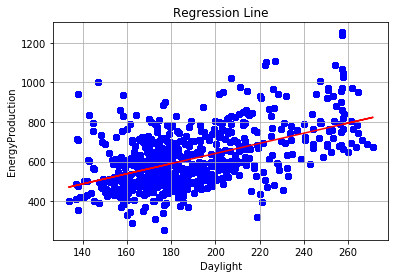

In [12]:
plt.scatter(X, Y, color = 'blue')         # 説明変数と目的変数のデータ点の散布図をプロット
plt.plot(X, lr.predict(X), color = 'red') # 回帰直線をプロット

plt.title('Regression Line')            # 図のタイトル
plt.xlabel('Daylight')                     # x軸のラベル
plt.ylabel('EnergyProduction')    # y軸のラベル
plt.grid()                                 # グリッド線を表示

plt.show()                                 # 図の表示

In [13]:
# DaylightとEnergyProductionに相関はあるが、ばらつきが大きい。
# Houseごとに、発電能力に差があるためでは？
MeanEnergy = np.mean(train_df_hde['EnergyProduction'])

In [14]:
print(MeanEnergy)

612.7488695652174


In [15]:
pivot_House = pd.pivot_table(train_df_hde, index='House')
# 各Houseごとの発電量の平均を求める

In [16]:
cases_House = train_df.shape[0]/pivot_House.shape[0]
print(cases_House)

23.0


In [17]:
eachHouse_perMeanEnergy = pivot_House/MeanEnergy
# 各Houseごとの平均を、全体の平均から求める係数を算出する

In [18]:
k_Energy_House_Mean = eachHouse_perMeanEnergy[['EnergyProduction']]

In [19]:
k_Energy_House_Mean_array = k_Energy_House_Mean.values

In [20]:
k_Energy_House_Mean_array.shape

(500, 1)

In [21]:
test_X = test_df[['Daylight']].values
test_Y = test_df[['EnergyProduction']].values

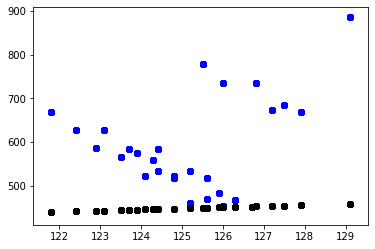

In [22]:
plt.scatter(test_X, test_Y, color='blue')
plt.scatter(test_X, lr.predict(test_X), color='black')

In [23]:
 sim_Y = k_Energy_House_Mean_array * lr.predict(test_X)

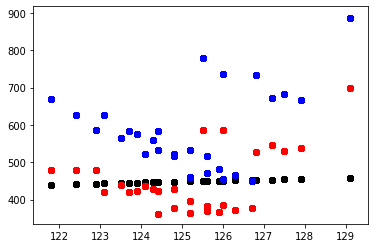

In [24]:
plt.scatter(test_X, lr.predict(test_X), color = 'black') 
plt.scatter(test_X, sim_Y, color = 'red') 
plt.scatter(test_X, test_Y, color='blue')
# ばらつき具合は、Houseごとの係数を考慮することで表現できている。
# 全体的に、発電量が小さい。北半球6月なら、太陽の角度が大きいことを考慮できていないため？

In [25]:
test_df.tail()

,ID,Label,House,Year,Month,Temperature,Daylight,EnergyProduction
495,11903,23,496,2013,6,19.3,125.9,483
496,11927,23,497,2013,6,21.9,122.4,628
497,11951,23,498,2013,6,22.8,127.2,673
498,11975,23,499,2013,6,21.9,126.8,735
499,11999,23,500,2013,6,22.7,122.9,586


In [26]:
# RandomForestを使い、Month, Daylight, House, TemperatureからEnergyProductionを推測してみる。

In [27]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=1000)

In [28]:
X = train_df.drop(['ID', 'Label', 'Year'], axis=1)
test_X = test_df.drop(['ID', 'Label', 'Year'], axis=1)

In [29]:
model.fit(X,Y)
predicted = model.predict(test_X)
model.score(test_X, test_Y)

/Users/saber/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/saber/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


0.08

In [47]:
model.score(test_X, predicted)

1.0

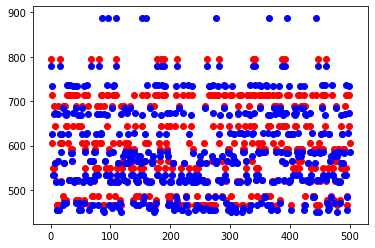

In [30]:
plt.scatter(test_X[['House']].values, predicted, color='red')
plt.scatter(test_X[['House']].values, test_Y, color='blue')

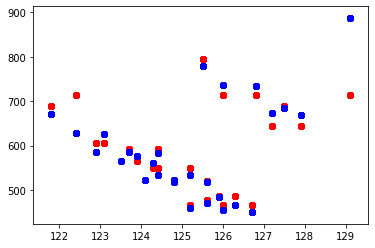

In [31]:
plt.scatter(test_X[['Daylight']].values, predicted, color='red')
plt.scatter(test_X[['Daylight']].values, test_Y, color='blue')

In [32]:
# RandomForestを使い、Month, Daylight, HouseからEnergyProductionを推測してみる。（Temperatureを除いた場合）
X_hdm = train_df.drop(['ID', 'Label', 'Year', 'Temperature'], axis=1)
test_X_hdm = test_df.drop(['ID', 'Label', 'Year', 'Temperature'], axis=1)

In [33]:
model_hdm = RandomForestClassifier(max_depth=1000)
model_hdm.fit(X_hdm,Y)
predicted_hdm = model_hdm.predict(test_X_hdm)

/Users/saber/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/saber/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


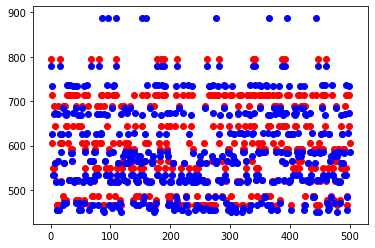

In [34]:
plt.scatter(test_X_hdm[['House']].values, predicted, color='red')
plt.scatter(test_X_hdm[['House']].values, test_Y, color='blue')

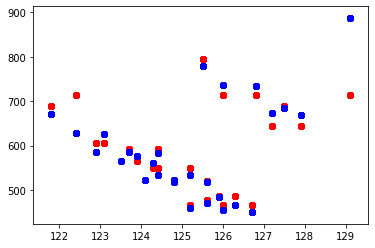

In [35]:
plt.scatter(test_X_hdm[['Daylight']].values, predicted, color='red')
plt.scatter(test_X_hdm[['Daylight']].values, test_Y, color='blue')

In [36]:
# Temperatureの影響があるかは、はっきりしない。
model_hdm.score(test_X_hdm, test_Y)

0.146

In [39]:
# SVCも試してみる。
from sklearn.svm import SVC
model_svc = SVC(gamma='scale')
model_svc.fit(X, Y)

/Users/saber/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [40]:
test_Y_svc = model_svc.predict(test_X)

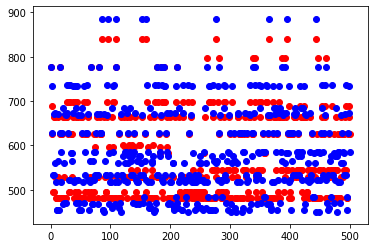

In [41]:
plt.scatter(test_X[['House']].values, test_Y_svc, color='red')
plt.scatter(test_X[['House']].values, test_Y, color='blue')

In [42]:
model_svc.score(test_X, test_Y)

0.0

In [43]:
model_svc_hdm = SVC(gamma='scale')
model_svc_hdm.fit(X_hdm, Y)

/Users/saber/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

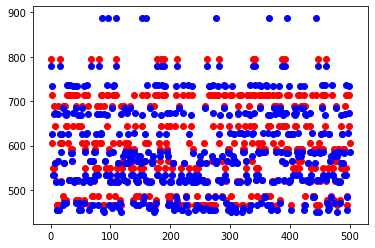

In [48]:
# RandomForestを使い、Month, Daylight, HouseからEnergyProductionを推測したものが、この中では一番よかった。
plt.scatter(test_X[['House']].values, predicted, color='red')
plt.scatter(test_X[['House']].values, test_Y, color='blue')